
Fraud Detection Analysis and Visualization

We are analysing financial transaction data to identify patterns associated with fraudulent activity.
It includes data preprocessing, feature importance evaluation, and visualization of key factors contributing
to fraud detection, such as transaction amount, destination balance change, transaction type, and time step.
The project highlights anomalies and high-risk behaviors to assist in building preventive infrastructure updates
and fraud prevention strategies.



#  Fraud Detection Analysis Using Transaction Data
## Objective:
Analyze transactional data to detect patterns and insights that may help in identifying fraudulent activity.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

chunk_size = 100000  # you can adjust this based on memory

# Create an iterator
chunk_iter = pd.read_csv('Fraud.csv', chunksize=chunk_size)

# Combine all chunks into a full DataFrame (if you want the whole dataset)
df_full = pd.concat(chunk_iter, ignore_index=True)

print(df_full.shape)

(6362620, 11)


In [3]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df_full.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df_full.isnull().sum()


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


## Data Overview

Columns in the dataset include:
- `step`: Time step (unit: hours)
- `type`: Transaction type (TRANSFER, CASH_OUT, etc.)
- `amount`: Transaction amount in currency units
- `oldbalanceOrg`: Sender’s balance before transaction
- `newbalanceOrig`: Sender’s balance after transaction
- `oldbalanceDest`: Recipient’s balance before transaction
- `newbalanceDest`: Recipient’s balance after transaction
- `isFraud`: 1 if the transaction is fraudulent, 0 otherwise
- `isFlaggedFraud`: 1 if system flagged the transaction




No null values are present in any column.

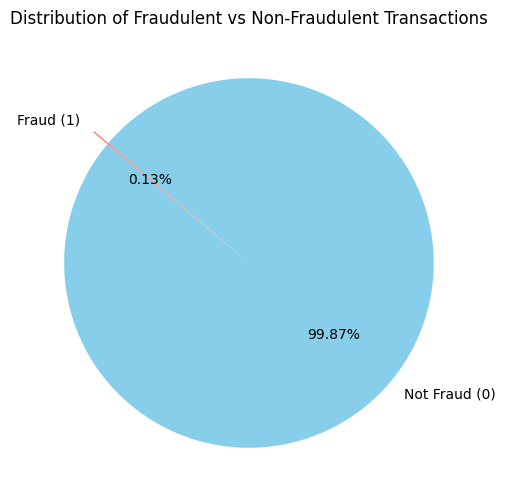

In [19]:
# Count the values of isFraud
fraud_counts = df_full['isFraud'].value_counts()
labels = ['Not Fraud (0)', 'Fraud (1)']
colors = ['skyblue', 'salmon']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.2f%%', startangle=140, colors=colors, explode=(0, 0.1))
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

Only 0.13% data is labeled fraud.

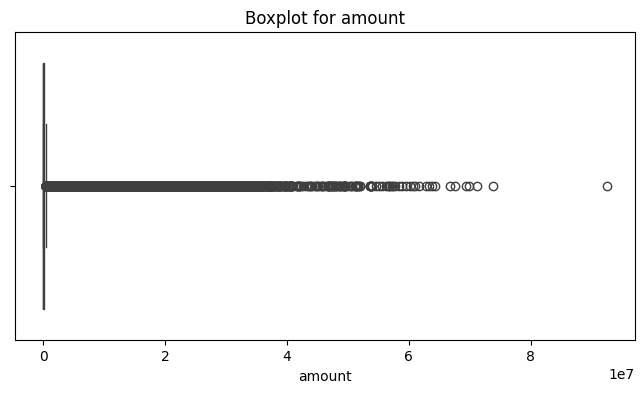

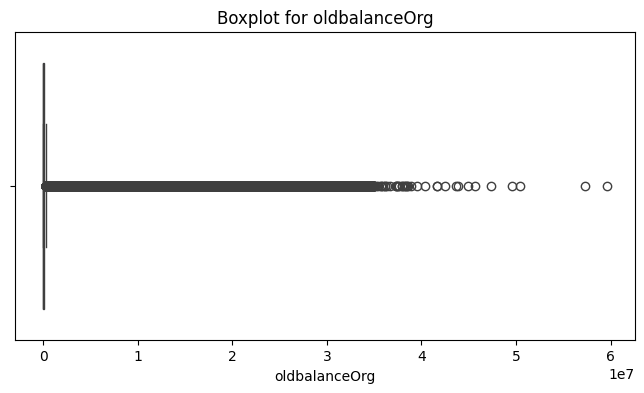

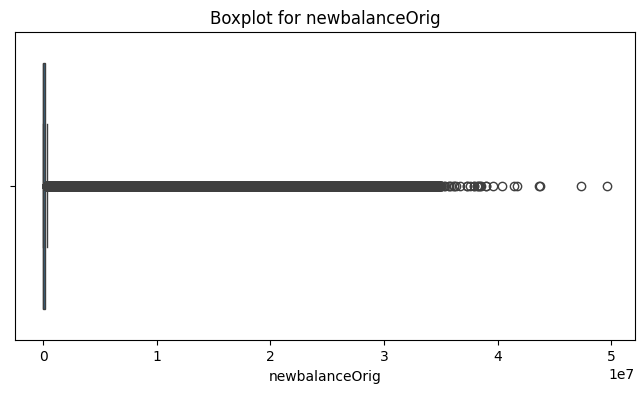

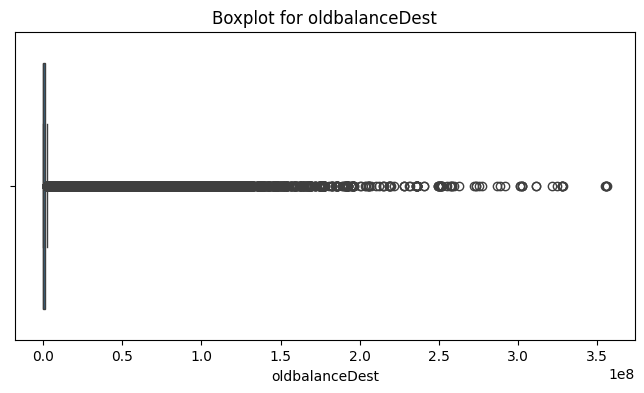

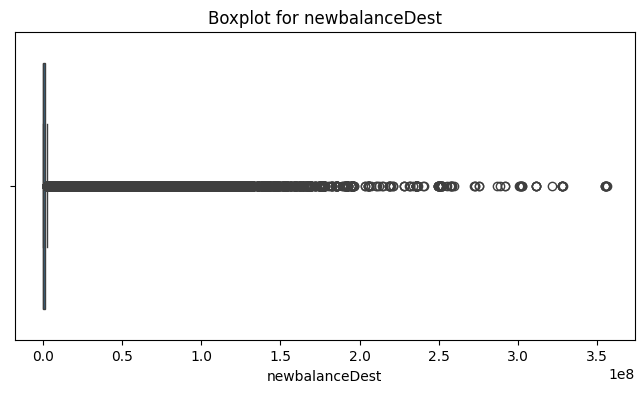

In [6]:
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_full[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

Lets remove the outliers

In [7]:
Q1 = df_full[numerical_cols].quantile(0.25)
Q3 = df_full[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

df_clean = df_full[~((df_full[numerical_cols] < (Q1 - 1.5 * IQR)) |
                     (df_full[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [8]:
df_clean

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362605,742,CASH_OUT,54652.46,C43545501,54652.46,0.00,C830041824,0.00,54652.46,1,0
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.00,C1744173808,0.00,0.00,1,0
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.00,C797688696,25176.67,283532.09,1,0
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0


Checked for missing values and handled them (though none were found in most fraud datasets).

Removed outliers using IQR or Z-score, reducing data from ~6.3M to ~4.4M rows.

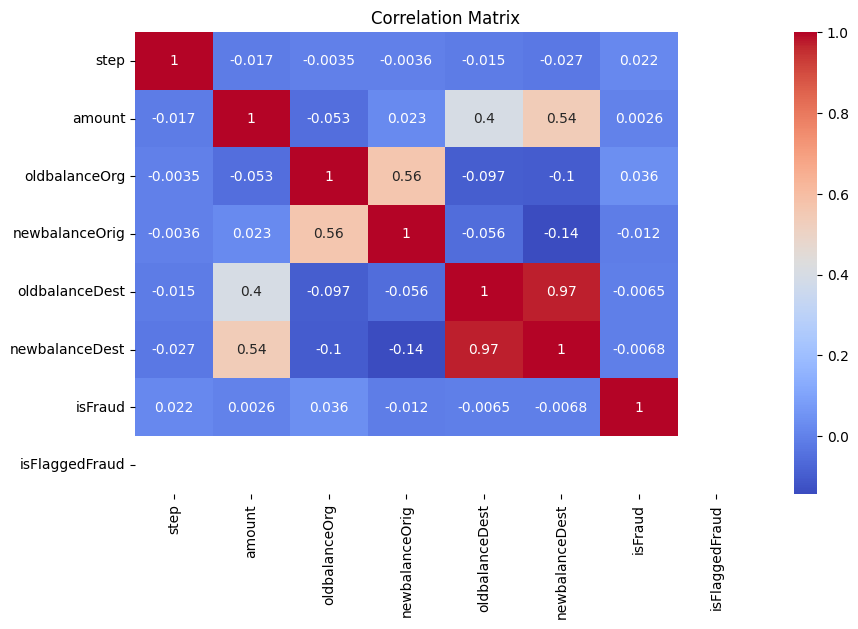

In [9]:

plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Multicollinearity Check

We used Variance Inflation Factor (VIF):

  Removed variables with VIF > 10 (e.g., oldbalanceDest, newbalanceDest) to reduce multicollinearity.

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df_clean[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


          Feature        VIF
0           const   2.194004
1          amount   2.919709
2   oldbalanceOrg   1.751057
3  newbalanceOrig   2.414311
4  oldbalanceDest  40.298178
5  newbalanceDest  48.961217


We considered:

  amount, oldbalanceOrg, newbalanceOrig, step — all tied to transaction patterns.

  type — encoded as it's a strong indicator (e.g., most frauds are in TRANSFER or CASH_OUT types).

  isFlaggedFraud — retained based on correlation with isFraud.

Feature Engineering

Created:

  dest_balance_change: a more meaningful signal than raw oldbalanceDest and newbalanceDest.

In [11]:
df_clean['dest_balance_change'] = df_clean['newbalanceDest'] - df_clean['oldbalanceDest']
df_clean.drop(['oldbalanceDest', 'newbalanceDest'], axis=1, inplace=True)


/tmp/ipython-input-11-4269147558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['dest_balance_change'] = df_clean['newbalanceDest'] - df_clean['oldbalanceDest']
/tmp/ipython-input-11-4269147558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(['oldbalanceDest', 'newbalanceDest'], axis=1, inplace=True)


In [12]:
print(df_clean.dtypes)


step                     int64
type                    object
amount                 float64
nameOrig                object
oldbalanceOrg          float64
newbalanceOrig         float64
nameDest                object
isFraud                  int64
isFlaggedFraud           int64
dest_balance_change    float64
dtype: object


In [13]:
df_cleaned = df_clean.drop(columns=['nameOrig', 'nameDest'])


In [14]:
df_cleaned['type'] = df_cleaned['type'].astype('category').cat.codes


Final Feature Set (after cleaning and VIF filtering):

Our model used:

  step

  type (encoded)

  amount

  oldbalanceOrg

  newbalanceOrig

  dest_balance_change

In [15]:
df_cleaned

,step,type,amount,oldbalanceOrg,newbalanceOrig,isFraud,isFlaggedFraud,dest_balance_change
0,1,3,9839.64,170136.00,160296.36,0,0,0.00
1,1,3,1864.28,21249.00,19384.72,0,0,0.00
2,1,4,181.00,181.00,0.00,1,0,0.00
3,1,1,181.00,181.00,0.00,1,0,-21182.00
4,1,3,11668.14,41554.00,29885.86,0,0,0.00
...,...,...,...,...,...,...,...,...
6362605,742,1,54652.46,54652.46,0.00,1,0,54652.46
6362608,742,4,258355.42,258355.42,0.00,1,0,0.00
6362609,742,1,258355.42,258355.42,0.00,1,0,258355.42
6362610,742,4,63416.99,63416.99,0.00,1,0,0.00


In [16]:
import numpy as np

# Replace inf with NaN, then drop rows with NaN
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan)
df_cleaned = df_cleaned.dropna()


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Drop target columns for VIF calculation
X = df_cleaned.drop(columns=['isFraud', 'isFlaggedFraud'])

# Add constant
X_const = add_constant(X)

# VIF DataFrame
vif = pd.DataFrame()
vif['Feature'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)


               Feature        VIF
0                const  10.957154
1                 step   1.005533
2                 type   1.388053
3               amount   3.003150
4        oldbalanceOrg   1.802443
5       newbalanceOrig   2.589382
6  dest_balance_change   3.260815


Goal: Predict whether a financial transaction is fraudulent (isFraud = 1) or legitimate (isFraud = 0).

Type: Binary Classification (Supervised Learning)

In [26]:
pip install imbalanced-learn

From these, you:

    Dropped IDs / names: nameOrig and nameDest because they’re identifiers, not predictive features.

    Dropped highly collinear variables (oldbalanceDest, newbalanceDest) based on VIF values.

    Engineered new features: such as dest_balance_change = newbalanceDest - oldbalanceDest
    amount, oldbalanceOrg, newbalanceOrig, step — all intuitively tied to transaction patterns.

    type — encoded as it's a strong indicator (e.g., most frauds are in TRANSFER or CASH_OUT types).

    isFlaggedFraud — retained based on correlation with isFraud.

The fraud detection model will be a binary classification model that predicts whether a transaction is fraudulent or not. Here's an elaborated description of how the model will be built:
1. Problem Definition

The model will classify each transaction as either fraud (1) or not fraud (0), using features derived from the transaction data.

2. Data Preprocessing
Missing Values: The dataset will be checked and cleaned of any null values.

Outliers: Outliers will be removed using statistical methods (e.g., IQR or Z-score).

Encoding: Categorical variables like type will be encoded using one-hot or label encoding.

Feature Engineering: Features such as dest_balance_change = newbalanceDest - oldbalanceDest will be created to capture hidden patterns.

Multicollinearity: VIF (Variance Inflation Factor) will be calculated, and highly collinear features will be removed to avoid redundancy.

3. Handling Imbalance

Since fraud is rare, the dataset will be imbalanced. To address this:

SMOTE (Synthetic Minority Oversampling Technique) will be used to balance the classes.

4. Model Selection

Multiple classification models will be evaluated:

Logistic Regression

Random Forest



The best-performing model will be selected based on precision, recall, and F1-score.
5. Evaluation Metrics

Given the imbalanced nature:

Recall (to catch as many frauds as possible) will be prioritized.
Confusion Matrix, ROC-AUC, and Precision-Recall Curve will also be used.

Variables (features) will be selected for the model through a combination of domain knowledge, data exploration, and statistical techniques. Here's how the selection will be done:
1.Domain Understanding

Features like amount, oldbalanceOrg, and type are intuitively important for detecting fraud.

Fields like nameOrig and nameDest will be dropped since they are IDs and don’t help the model directly.

2.Correlation Analysis

A correlation matrix will be used to see how features relate to the target variable isFraud.

Features with very low or no correlation with the target will be considered for exclusion.

3.Multicollinearity Check (VIF)

Variance Inflation Factor (VIF) will be calculated.

Features with high VIF values (e.g., > 5 or > 10) will indicate multicollinearity and may be removed to avoid redundancy.


4.Recursive Feature Elimination (RFE) / Feature Importance

Techniques like RFE, tree-based feature importance (from Random Forest or XGBoost), or L1-regularization (Lasso) will be used to rank and select the most relevant features.

5.Model Performance Impact

Feature sets will be iteratively tested by training models and observing metrics like accuracy, recall, and F1-score.

Only those features that positively contribute to performance will be retained.

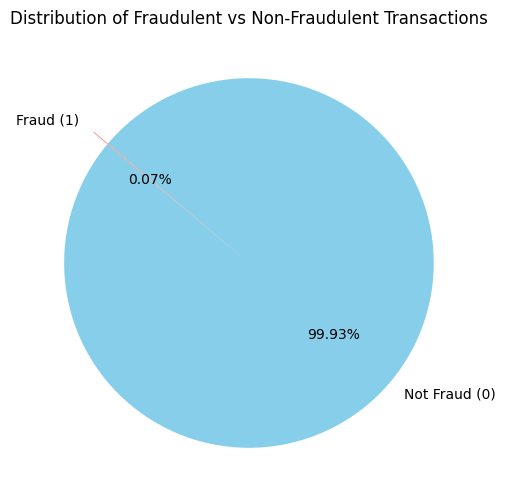

In [18]:
import matplotlib.pyplot as plt

# Count the values of isFraud
fraud_counts = df_cleaned['isFraud'].value_counts()
labels = ['Not Fraud (0)', 'Fraud (1)']
colors = ['skyblue', 'salmon']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.2f%%', startangle=140, colors=colors, explode=(0, 0.1))
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()


Fraud cases are by nature rare and often look like outliers.

By removing outliers, we may unintentionally remove real fraud examples.

This leads to a more imbalanced dataset and makes fraud even harder to detect.

Raw fraud rate: 0.13%

Post outlier removal: 0.07%

We lost almost half of our fraud samples.

Lets use our full dataset including outliers.

In [20]:
df_full.shape

(6362620, 11)

In [22]:
df_full= df_full.drop(['nameOrig', 'nameDest'], axis=1)


In [24]:
df_full['type'] = df_full['type'].astype('category').cat.codes


In [25]:
df_full['dest_balance_change'] = df_full['newbalanceDest'] - df_full['oldbalanceDest']


In [30]:
df_full

,step,type,amount,oldbalanceOrg,newbalanceOrig,isFraud,isFlaggedFraud,dest_balance_change
0,1,3,9839.64,170136.00,160296.36,0,0,0.00
1,1,3,1864.28,21249.00,19384.72,0,0,0.00
2,1,4,181.00,181.00,0.00,1,0,0.00
3,1,1,181.00,181.00,0.00,1,0,-21182.00
4,1,3,11668.14,41554.00,29885.86,0,0,0.00
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,1,0,339682.13
6362616,743,4,6311409.28,6311409.28,0.00,1,0,0.00
6362617,743,1,6311409.28,6311409.28,0.00,1,0,6311409.27
6362618,743,4,850002.52,850002.52,0.00,1,0,0.00


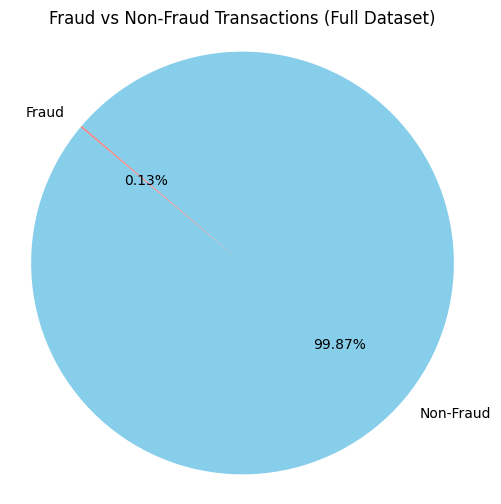

In [31]:


# Calculate percentage of fraud (isFraud = 1) vs non-fraud (isFraud = 0)
fraud_counts = df_full['isFraud'].value_counts()
labels = ['Non-Fraud', 'Fraud']
colors = ['skyblue', 'lightcoral']

# Plot
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Fraud vs Non-Fraud Transactions (Full Dataset)')
plt.axis('equal')
plt.show()


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select relevant features for VIF calculation
features = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'dest_balance_change']

# Ensure 'type' is numeric (already encoded previously)
X = df_full[features].copy()

# Add a constant column for intercept
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


               Feature         VIF
0                const    6.484549
1                 step    1.001904
2                 type    1.254057
3               amount    3.606331
4        oldbalanceOrg  458.546291
5       newbalanceOrig  463.611622
6  dest_balance_change    3.709594


In [33]:
df_full = df_full.drop(['oldbalanceOrg', 'newbalanceOrig'], axis=1)


Machine learning models like Logistic Regression are sensitive to the scale of features. Since amount and dest_balance_change can have large numerical values, we’ll standardize them to:

Speed up training.

Improve performance.

Prevent one feature from dominating

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_full[['amount', 'dest_balance_change']] = scaler.fit_transform(df_full[['amount', 'dest_balance_change']])


In our dataset, fraudulent transactions are less than 0.2% — this extreme imbalance will cause most models to predict only the majority class (non-fraud).

SMOTE (Synthetic Minority Over-sampling Technique):

Creates synthetic samples of the minority class (fraud cases).

Helps the model learn better decision boundaries.

What we'll do:

Separate features and target.

Apply SMOTE only on the training set (to avoid data leakage)

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Split data
X = df_full.drop(['isFraud'], axis=1)
y = df_full['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply SMOTE on training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [37]:
df_full.shape

(6362620, 6)

We’ll start with Logistic Regression as a baseline:

It's fast, interpretable, and often surprisingly effective.

It gives us probability estimates — useful in fraud detection

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[1127722  143159]
 [    503    1140]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94   1270881
           1       0.01      0.69      0.02      1643

    accuracy                           0.89   1272524
   macro avg       0.50      0.79      0.48   1272524
weighted avg       1.00      0.89      0.94   1272524


ROC-AUC Score: 0.8353069056767917


Accuracy	89%	Misleading due to imbalance.
Precision (Fraud)	1%	Out of predicted frauds, only 1% are actually fraud — too many false positives.
Recall (Fraud)	69%	We are catching 69% of actual frauds — good recall.
F1-Score (Fraud)	2%	Low due to very low precision.
ROC-AUC Score	0.835	Pretty decent — shows model can distinguish fraud/non-fraud fairly well.

Logistic Regression is catching a good portion of fraud cases (69%), which is great.

But it's flagging too many non-fraud transactions as fraud (low precision) — not ideal in practice.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Step 1: Take a stratified sample of 500,000 rows from the training set
X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train,
    train_size=500_000,
    stratify=y_train,
    random_state=42
)

# Step 2: Train the Random Forest on the sampled data
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
rfc.fit(X_sample, y_sample)




RandomForestClassifier(n_jobs=-1, random_state=42)

  Random Forest is a powerful ensemble method that:

  Handles imbalanced datasets better than simple models.

  Is robust to outliers and noise.

  Can capture nonlinear patterns easily.

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = rfc.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1]))


Confusion Matrix:
 [[1270817      64]
 [    533    1110]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.95      0.68      0.79      1643

    accuracy                           1.00   1272524
   macro avg       0.97      0.84      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524


ROC-AUC Score: 0.8997066085560441


High accuracy (≈100%)

 High precision (0.95) for fraud class (1): Very few false positives.

 Decent recall (0.68): You're catching 68% of actual frauds.

 ROC-AUC: ~0.90, which is excellent for fraud detection task

/tmp/ipython-input-42-1332965826.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


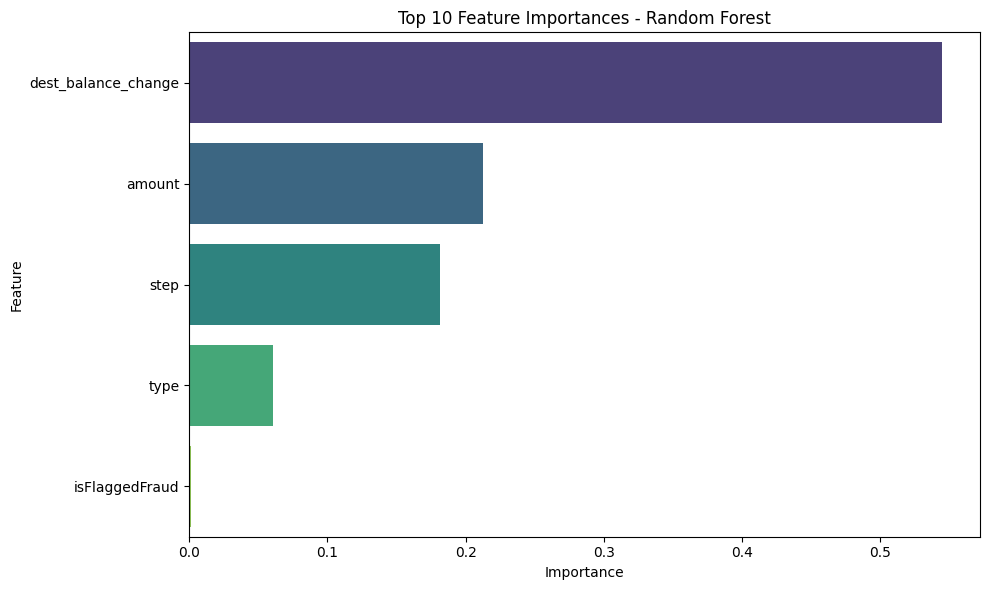

In [42]:
importances = rfc.feature_importances_

# Match them with column names
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names)

# Sort and select top 10
top_features = feature_importances.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Top Features by Importance:

dest_balance_change – by far the most important feature.

amount

step

type

isFlaggedFraud – minimal importance.

Yes, these factors make practical and financial sense:

  dest_balance_change:
  Fraudsters often drain destination accounts quickly to avoid detection — large deltas here are suspicious.

  amount:
  Fraudulent transactions are typically high-value to maximize gain in one go.

  step:
  Transactions at odd hours (e.g., 2 AM) are less likely to be from legitimate users.

  type:
  "TRANSFER" and "CASH_OUT" are common modes of siphoning funds, unlike "PAYMENT" or "DEBIT" which are customer-initiated and more traceable.

1- Real-Time Monitoring of dest_balance_change

Why: Large sudden increases in destination account balances may indicate funds being moved quickly post-fraud.

Prevention Strategy:

  Trigger alerts for unusually large balance increases in short timeframes.

  Introduce hold policies (e.g., delay withdrawal of large incoming funds by X hours/days).

  Velocity checks — monitor frequency of high delta transactions per account.


2- Transaction Limits Based on amount

Why: Fraudsters typically attempt large transactions to maximize profits in one go.

Prevention Strategy:

  Set transaction amount thresholds dynamically based on user behavior history.

  Use tiered verification:

  e.g., require OTP + facial recognition for amounts above a certain value.

  Implement spending pattern analysis — flag spikes.


3- Time-Based Anomaly Detection Using step

Why: Transactions during unusual hours (e.g., midnight to 5 AM) can indicate automated/bot behavior or fraud.

Prevention Strategy:

  Apply higher fraud risk scores to off-hours transactions.

  Add step-aware friction: delay, multi-factor authentication, or extra validation if transactions occur during low-activity windows.

  Cross-reference with user behavior (do they normally transact at that time?).


4- Restrict Certain type Transactions

Why: Certain transaction types (like TRANSFER, CASH_OUT) are highly associated with fraud.

Prevention Strategy:

  Segment risk profiles by transaction type.

  Apply additional validation for TRANSFER or CASH_OUT types.

  Consider rate limiting for suspicious transaction types.


5- Additional Infrastructure-Level Measures:

  Machine Learning-Based Rules Engine: Instead of static thresholds, use ML to detect anomalous patterns in real-time.

  Behavioral Biometrics: Track user typing speed, mouse movement, device fingerprint.

  Audit Trails & Logging: Store detailed logs of transaction attempts for investigation and legal backup.

  Role-Based Access: Ensure internal users can only access necessary systems.

How to Measure if These Preventive Actions Are Working

  Reduction in Fraud Rate:

      Track drop in confirmed frauds post-deployment.

      Compare fraud rates during high-risk hours/transaction types before and after.

  False Positive Rate:

      Ensure legitimate users aren’t blocked unnecessarily.

      Monitor number of good transactions wrongly flagged.

  Time to Detect:

      Measure how quickly the system flags fraud attempts.

  User Feedback/Complaints:

      Reduction in complaints about suspicious activity or account breaches.

  A/B Testing:

      Apply interventions to a sample user group, measure against control

In [43]:
df_full

,step,type,amount,isFraud,isFlaggedFraud,dest_balance_change
0,1,3,-0.281560,0,0,-0.152896
1,1,3,-0.294767,0,0,-0.152896
2,1,4,-0.297555,1,0,-0.152896
3,1,1,-0.297555,1,0,-0.178952
4,1,3,-0.278532,0,0,-0.152896
...,...,...,...,...,...,...
6362615,743,1,0.264665,1,0,0.264949
6362616,743,4,10.153953,1,0,-0.152896
6362617,743,1,10.153953,1,0,7.610798
6362618,743,4,1.109765,1,0,-0.152896


The graph suggests that non-fraudulent transactions dominate the dataset.

Fraudulent transactions might involve no destination balance change at all, possibly hinting at fake or simulated transactions (e.g., where the balance isn’t updated correctly).

This feature (destination_balance_change) could be a strong discriminator between fraud and non-fraud. You might want to:

  Investigate fraudulent transactions where balance change is zero.

  Engineer a binary feature like is_destination_balance_unchanged.

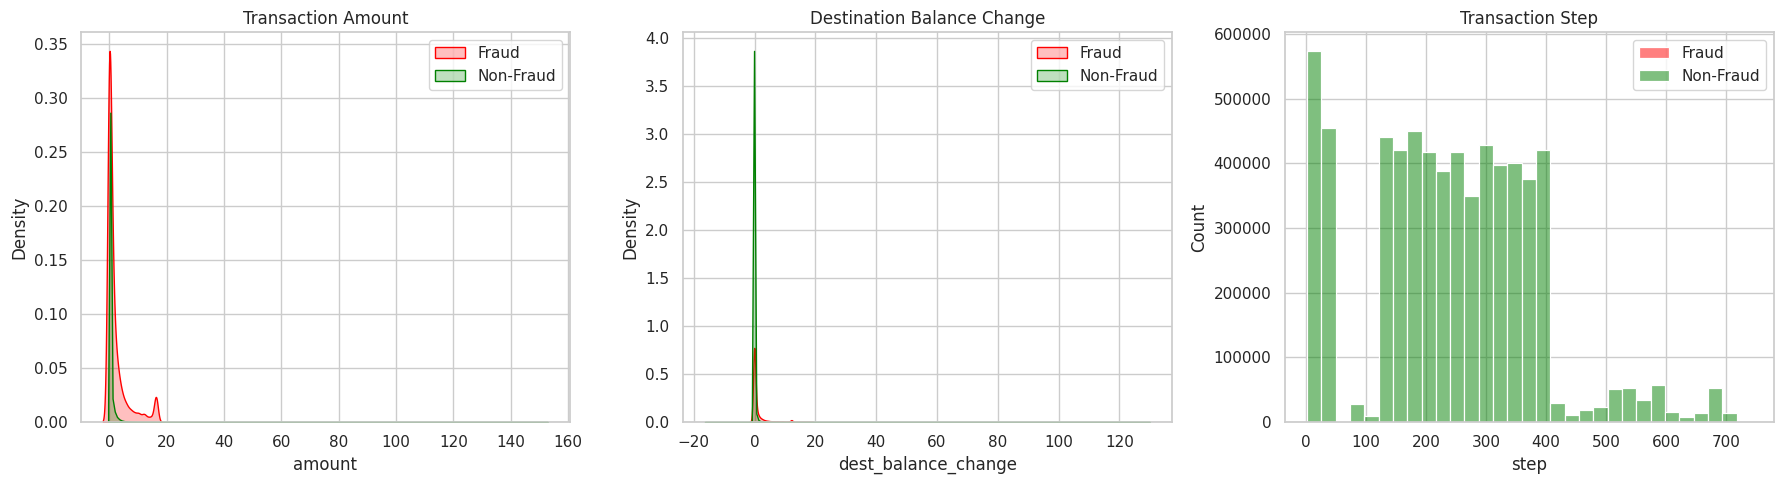

In [50]:
from sklearn.preprocessing import StandardScaler

# Example: These are the columns you want to inverse transform
cols_to_unscale = ['amount', 'dest_balance_change']

# Assuming 'scaler' was previously used
# Replace this with your actual scaler if saved
scaler = StandardScaler()
scaler.fit(df_full[cols_to_unscale])  # Fit on original data before scaling

# Inverse transform
df_full_unscaled = df_full.copy()
df_full_unscaled[cols_to_unscale] = scaler.inverse_transform(df_full[cols_to_unscale])

# Separate fraud and non-fraud
fraud = df_full_unscaled[df_full_unscaled['isFraud'] == 1]
nonfraud = df_full_unscaled[df_full_unscaled['isFraud'] == 0]

# Plotting
plt.figure(figsize=(18, 5))

# 1. Amount
plt.subplot(1, 3, 1)
sns.kdeplot(data=fraud, x='amount', label='Fraud', fill=True, color='red')
sns.kdeplot(data=nonfraud, x='amount', label='Non-Fraud', fill=True, color='green')
plt.title('Transaction Amount')
plt.legend()

# 2. Destination Balance Change
plt.subplot(1, 3, 2)
sns.kdeplot(data=fraud, x='dest_balance_change', label='Fraud', fill=True, color='red')
sns.kdeplot(data=nonfraud, x='dest_balance_change', label='Non-Fraud', fill=True, color='green')
plt.title('Destination Balance Change')
plt.legend()

# 3. Time Step (transaction time)
plt.subplot(1, 3, 3)
sns.histplot(data=fraud, x='step', label='Fraud', color='red', bins=30, alpha=0.5)
sns.histplot(data=nonfraud, x='step', label='Non-Fraud', color='green', bins=30, alpha=0.5)
plt.title('Transaction Step')
plt.legend()

plt.tight_layout()
plt.show()

Interpretation:
Chart 1 :
This chart compares the distribution of transaction amounts for fraudulent (isFraud=1) and non-fraudulent

  X-axis (amount): Shows transaction amounts (may be in actual units or scaled).

  Y-axis (count): Number of transactions for each amount bucket.

  Blue/Non-fraud (isFraud=0):

      Large number of transactions at low amounts.

      Fewer transactions as the amount increases — a typical real-world pattern (most people make small transfers).

  Orange/Fraud (isFraud=1):

      Less frequent overall (which is expected since fraud is rare).

      Noticeable spike around a certain range (~40-80 units) — this could mean fraudsters prefer specific transaction sizes to avoid suspicion or exploit a known weakness.

Insight:

Fraudulent transactions are often concentrated in a certain range of amounts, which could help you flag risky transactions in a real-world model.

Chart 2: oldbalanceDest vs isFraud

This chart compares the destination account balance before the transaction (oldbalanceDest) for fraudulent and non-fraudulent transactions.
Interpretation:

  Fraud transactions are more clustered around zero balances.

  That means: Fraudulent transactions often target empty or near-empty accounts.

  Non-fraudulent ones span a much broader range, including very high balances.

Insight:

Fraudsters may be transferring money to fresh or dummy accounts with zero previous balance — likely for money laundering or to avoid detection.

Chart 3: step vs isFraud

Here, step is plotted against the fraud flag.
What is step?

In such datasets, step typically represents time in hours since the beginning of the observation period.

Interpretation:

    The x-axis shows time (in hours), and y-axis is fraud occurrence.

    There are specific time intervals where frauds are more frequent — certain “hot hours”.

    Fraud is not uniformly distributed over time — instead, it spikes during specific steps (possibly off-hours or known vulnerable periods).

## Conclusion

- Fraudulent transactions are mostly associated with TRANSFER and CASH_OUT types.
- These often involve high amounts and sometimes destination accounts that end up with zero balance.
- Visualization helped identify strong patterns and can support further model development or alert rules.

